# Tutoriel de mise en forme des données aux fins d’apprentissage machine

Nous verrons dans ce tutoriel comment préparer vos données pour obtenir les meilleurs résultats possibles en termes d’apprentissage machine. Nous combinerons des données sur la circulation en vélo et sur les conditions météorologiques afin de prédire le niveau du flux de vélos en fonction de la météo. Pour ce faire, nous utiliserons des sources de données ouvertes, vérifierons la structure et la cohérence desdites données, et corrigerons toute erreur d’orthographe ou de formatage susceptible d’entraver la procédure computationnelle. Nous intégrerons aussi à cette base de données toutes valeurs additionnelles nécessaires pour que vous obteniez des résultats exacts.

Pour exploiter ces données, nous utilisons la régression linéaire, c’est-à-dire le plus simple des modèles d’apprentissage machine, capable de faire des prévisions au niveau des données de sortie à partir de données d’entrée inconnues à ce jour, en traçant la ligne qui correspond le mieux à l’ensemble des données d’entrée connues déjà exploitées.

Mais d’où viennent nos données ? Fort heureusement, la Ville d’Ottawa est dotée de plusieurs compteurs de vélos qui calculent quotidiennement le nombre de vélos circulant sur certaines routes. Leur site Web de données ouvertes est très utile. Pour la météo, nous faisons appel à Environnement Canada qui vous offre la possibilité de télécharger des données climatiques historiques. Nous pouvons combiner ces deux grands jeux de données pour constituer nos données d’apprentissage. Nous avons d’ores et déjà téléchargé ces jeux de données que vous trouverez dans le référentiel des tutoriels. 


## Les objectifs d'apprentissage

Durée moyenne d'exécution : 60 min

À la fin de ce tutoriel, vous devriez être en mesure :
* D’épurer vos données et de décrire en quoi cela est important pour l’apprentissage machine  
* De combiner des jeux de données
* De supprimer les valeurs aberrantes et les données inutiles 
* De combler les données manquantes
* De visualiser les données pour mieux comprendre
* De décrire en quoi consiste la régression linaire et comment l’utiliser


## Ce dont vous aurez besoin pour compléter le tutoriel

* Consultez le [document d'introduction](https://uottawa-it-research-teaching.github.io/machinelearning/) pour connaître les exigences générales et le fonctionnement des carnets Jupyter.
* Nous aurons aussi besoin de Pandas pour faciliter la gestion des données. C’est un outil Python très puissant, capable de lire les fichiers CSV et Excel. Il offre aussi d’excellentes capacités de manipulation de données, ce qui est très utile pour l’épuration des données.
* Nous utiliserons la boîte d’outils scikit-learn pour l’apprentissage automatique
* Les fichiers de données normalement associées au présent carnet.


## Les meilleures pratiques en termes de gestion des données de recherche 

Une bonne manipulation des données destinées à l’apprentissage machine commence par une gestion efficace des données de recherche (GDR). La qualité de vos données de base aura une incidence sur vos éventuels résultats. Au même titre, la reproductibilité de vos résultats dépendra de vos données de base et de la façon dont vous organiserez vos données pour permettre à d’autres personnes (et aux machines!) de comprendre ces données et de pouvoir les réutiliser.

Nous devrons aussi constamment recourir aux meilleures pratiques de gestion des données de recherche, pratiques recommandées par l'[Alliance de recherche numérique du Canada of Canada](https://zenodo.org/records/4000989) (en anglais).

ENREGISTREZ VOS DONNEÉES BRUTES DANS LEUR FORMAT ORIGINAL
* N’écrasez pas vos données d’origine par des version épurées.
* Protégez vos données d’origine en les verrouillant ou en les rendant pour lecture seule.
* Retournez à ces données d’origine si les choses tournent mal (comme c’est souvent le cas!).

SAUVEGARDEZ VOS DONNÉES
* Utilisez la règle 3-2-1 : enregistrez trois copies de vos données, dont deux copies sur deux supports différents et la troisième hors site. Le stockage hors site peut se faire sur OneDrive ou sur Google drive, ou tout autre support fournit par votre établissement.
* Nous utilisons des données ouvertes qui ne contiennent aucun renseignement d’identifier une personne ou de données à diffusion restreinte ou devant être protégées. Par contre, il sera important de restreindre l’accès et d’encoder vos données si certaines d’entre elles contiennent des informations confidentielles.

Quelques autres meilleures pratiques de gestion des données de recherche faciliteront la gestion de votre projet. Nous les mettrons en évidence au début de chaque tutoriel.  

## Épurez vos données

Nous nous fierons beaucoup à Pandas pour épurer nos données car cette application comporte de très puissants outils de filtrage et de manipulation. Cela permettra de formater nos données et de faciliter leur analyse via la régression linéaire. Si le temps consacré à épurer des données provenant d’autres sources peut être considérable, cette étape est cruciale pour assurer l’exactitude de vos résultats. 

In [ ]:
# Vous devrez installer une version un peu plus récente de Pandas si vous exécutez ce code sur SyZyGy.
# Exécutez cette cellule puis redémarrez le noyau.
!pip install "pandas>=1.5.3"

In [2]:
import numpy as np
import pandas as pd
pd.__version__

'1.5.3'

Nous examinerons maintenant la circulation à vélo afin de prédire quel sera le flux de vélos en fonction des conditions météorologiques.

Pour ce faire, nous avons besoin de données relatives à la circulation à vélo et de données météos. Fort heureusement, la Ville d’Ottawa est dotée de plusieurs compteurs de vélos qui calculent quotidiennement le nombre de vélos circulant sur certaines routes. Le site [Ottawa Ouverte](https://ouverte.ottawa.ca/?locale=fr) est extrêmement utile pour cela. Pour la météo, nous faisons appel à Environnement Canada qui vous offre la possibilité de [télécharger des données météorologiques historiques](https://climat.meteo.gc.ca/historical_data/search_historic_data_f.html). Nous pouvons combiner ces deux grands jeux de données pour constituer nos données d’apprentissage. 

#### Jeux de données 1: données sur le cyclisme

La toute première étape d’épuration des données consiste à lire les données ! Assurez-vous d’avoir sous la main le fichier « bike_counter.xlsx » qui accompagne normalement ce carnet. En cas contraire, vous pouvez le télécharger via le lien intégré au commentaire ci-dessous.

In [3]:
# https://open.ottawa.ca/documents/bicycle-trip-counters/about
bike2020 = pd.read_excel('MLTS_20240530_DCRF_Bike_Counter_1.0.xlsx', sheet_name="2020")

Pandas a maintenant lu et enregistré les données dans la variable `bike2020`. Nous pouvons donc maintenant les utiliser dans notre carnet.

Voyons les données à notre disposition.

In [4]:
bike2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       366 non-null    datetime64[ns]
 1   1^ALEX     257 non-null    float64       
 2   2^ORPY     257 non-null    float64       
 3   3^COBY     267 non-null    float64       
 4   4^CRTZ     366 non-null    int64         
 5   5^LMET     366 non-null    int64         
 6   10^OGLD    360 non-null    float64       
 7   11 OBVW    365 non-null    float64       
 8   12a^ADAWE  336 non-null    float64       
 9   12b^ADAWE  336 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 28.7 KB


Les noms des colonnes peuvent sembler obscurs mais de fait, la Ville d’Ottawa applique les meilleures pratiques de gestion des données de recherche. Elle a décrit les variables dans un récapitulatif accessible sur son site Web. Cette documentation limpide des variables, fidèle au processus de collecte de données, nous aide à réutiliser les données !

Selon le récapitulatif, ces colonnes illustrent divers aspects des différentes routes sur lesquelles les données ont été recueillies.

Les valeurs non nulles correspondent au nombre de jours au cours desquels le matériel a enregistré un « décompte des déplacements en vélo (total des deux directions sauf indication contraire) ».

Veuillez noter que nous avons 366 entrées (une pour chaque jour d’une année bissextile). Toutefois, en observant les différentes routes, il n’y a pas 366 valeurs non nulles. Il y a donc des données manquantes !

Les données manquantes sont assez caractéristiques des jeux de données brutes. Il est mentionné dans la synthèse de ce jeu de données spécifique sur Ottawa ouverte, que des équipements sont parfois non fonctionnels et ne peuvent donc pas recueillir de données.

Nous devrons en tenir compte mais examinons d’abord les données. Nous pouvons exploiter les diverses fonctions de traçage pour visualiser les données. La visualisation est un outil efficace pour vérifier les données car elle donne une vue d’ensemble qui permet de constater rapidement si des choses étranges se sont produites.

Il faut pour cela pouvoir interpréter suffisamment bien les données avec lesquelles vous travaillez. Si visualiser des jeux de données complexes peut être particulièrement difficile et nécessiter une certaine expertise en la matière, la visualisation est avantageuse en raison des renseignements qu’elle fournit.

Dans notre cas, nous avons un compteur qui dénombre des vélos. Aucune expertise requise ! Alors procédons au traçage de données. 


<Axes: xlabel='Date', ylabel='[12b^ADAWE]'>

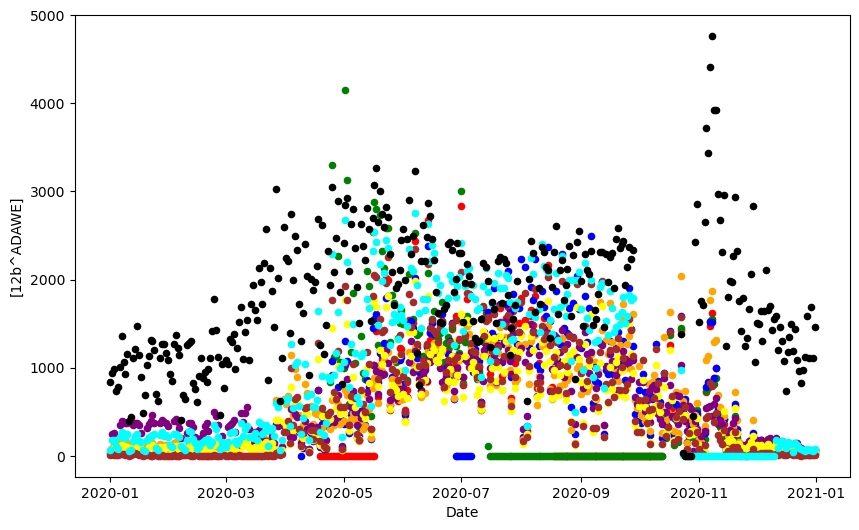

In [5]:
ax = bike2020.plot(x='Date', y=['1^ALEX'], kind='scatter', color='red', figsize=(10,6))
bike2020.plot(x='Date', y=['2^ORPY'], kind='scatter', color='green', ax=ax)
bike2020.plot(x='Date', y=['3^COBY'], kind='scatter', color='blue', ax=ax)
bike2020.plot(x='Date', y=['4^CRTZ'], kind='scatter', color='orange', ax=ax)
bike2020.plot(x='Date', y=['5^LMET'], kind='scatter', color='purple', ax=ax)
bike2020.plot(x='Date', y=['10^OGLD'], kind='scatter', color='yellow', ax=ax)
bike2020.plot(x='Date', y=['11 OBVW'], kind='scatter', color='brown', ax=ax)
bike2020.plot(x='Date', y=['12a^ADAWE'], kind='scatter', color='cyan', ax=ax)
bike2020.plot(x='Date', y=['12b^ADAWE'], kind='scatter', color='black', ax=ax)

Ces diagrammes de dispersion illustrent le dénombrement effectué par tous les compteurs de vélo sur des périodes données, chaque compteur étant associé à une couleur différente.

Pour que les algorithmes d’apprentissage automatique fonctionnent parfaitement, les données utilisées pour l’apprentissage doivent être de bonne qualité. Les données erronées affecteront notre modèle et nuiront à sa performance. Comme le dit l’adage, « à données inexactes, résultats erronés ».

À titre d’exemple, Le diagramme de dispersion affiche plusieurs dates auxquelles aucune donnée n’a été enregistrée sur certaines routes, indiquant 0 déplacement à vélo. Notre hypothèse, basée sur la synthèse des données affichée sur le site Web, veut qu’il y ait au moins un cycliste par jour, même dans les pires conditions météorologiques. Nous supposerons alors que la valeur 0 signifie que la route était fermée ou que le compteur était défectueux. Est-ce là une hypothèse valide ? Pour notre modèle prédictif, maintenir la valeur 0 affecterait encore davantage l’exactitude de nos résultats que l’épuration de cette donnée. Nous la supprimerons donc en transformant la valeur 0 en valeur manquante. Cela améliorera la validité de nos résultats au niveau de la régression linéaire.

De fait, la meilleure pratique de gestion des données de recherche consiste à ne jamais avoir de valeur vide dans une cellule. Dans notre cas, nous ne voulons pas de valeur 0 car celle-ci serait traitée comme une valeur numérique. En la transformant en valeur manquante, elle sera ignorée lors du traitement des données. Pandas dispose d’une fonction pd.NA pour indiquer que cette valeur n’est pas disponible. D’autres bibliothèques pourront l’identifier comme n’étant pas un nombre (NaN).

In [6]:
# Effectuer une boucle sur tous les noms de colonnes sauf pour la colonne Date.
for colname in bike2020.columns.drop('Date'):
    bike2020.loc[bike2020[colname] <= 0.01, colname] = pd.NA

Nous retracerons maintenant les données pour voir ce que cela donne.

<Axes: xlabel='Date', ylabel='[12b^ADAWE]'>

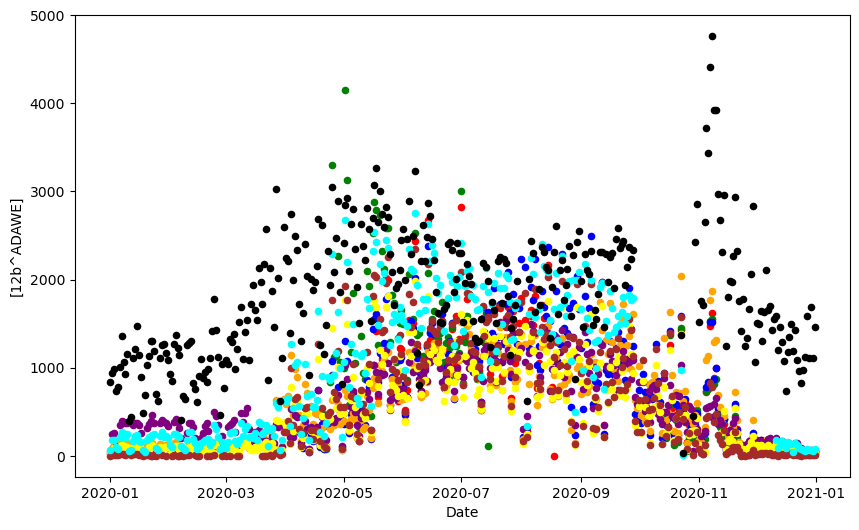

In [7]:
ax = bike2020.plot(x='Date', y=['1^ALEX'], kind='scatter', color='red', figsize=(10,6))
bike2020.plot(x='Date', y=['2^ORPY'], kind='scatter', color='green', ax=ax)
bike2020.plot(x='Date', y=['3^COBY'], kind='scatter', color='blue', ax=ax)
bike2020.plot(x='Date', y=['4^CRTZ'], kind='scatter', color='orange', ax=ax)
bike2020.plot(x='Date', y=['5^LMET'], kind='scatter', color='purple', ax=ax)
bike2020.plot(x='Date', y=['10^OGLD'], kind='scatter', color='yellow', ax=ax)
bike2020.plot(x='Date', y=['11 OBVW'], kind='scatter', color='brown', ax=ax)
bike2020.plot(x='Date', y=['12a^ADAWE'], kind='scatter', color='cyan', ax=ax)
bike2020.plot(x='Date', y=['12b^ADAWE'], kind='scatter', color='black', ax=ax)

Vous constaterez que les étendues de 0 ont maintenant disparu. Nettement mieux ! Cela correspond davantage aux attentes.

La dispersion des points noirs, qui diffère grandement de celle des autres couleurs, semble toutefois étrange. Il y a un étrange pic en novembre pour « 12b^ADAWE ». Selon le site Wen d’où proviennent les données, cela correspond à la « traverse pour piétons Adàwe ». S’agit-il donc vraiment de cyclistes ? Ou s’agit-il d’un autre jeu de données aberrantes qui affectera la validité de notre modèle prédictif ? Nous n’en savons pas encore assez pour nous prononcer. Nous conserverons donc pour l’instant ces points de données tout en les considérant comme douteux. Nous approfondirons la question plus tard.

#### Jeu de données 2 : données météorologiques

Examinons maintenant le jeu de données météorologiques que nous combinerons aux données cyclistes ! Utilisez pour cela le fichier « en_climate_daily_ON_6106001_2020_P1D.csv » que vous trouverez dans le référentiel du tutoriel. Ces données ont été téléchargées au départ du site d’Environnement Canada.

Lisons les données à l’aide de la fonction de lecture `pd.read_csv` de Pandas avant de les stocker dans la nouvelle variable intitulé `weather2020`. Nous utiliserons ensuite la fonction `.info()` que nous connaissons déjà pour vérifier à combien de valeurs manquantes nous avons affaire.

Le lien affiché dans le commentaire indique l’endroit à partir duquel nous avons téléchargé les données.   Pouvoir retracer l’origine de vos données est une excellente pratique.

In [8]:
# https://climate.weather.gc.ca/climate_data/daily_data_e.html?hlyRange=2011-12-14%7C2023-01-25&dlyRange=2011-12-15%7C2023-01-25&mlyRange=%7C&StationID=49568&Prov=ON&urlExtension=_e.html&searchType=stnName&optLimit=yearRange&StartYear=1840&EndYear=2023&selRowPerPage=25&Line=14&searchMethod=contains&txtStationName=ottawa&timeframe=2&time=LST&Day=25&Year=2020&Month=1#
weather2020 = pd.read_csv('MLTS_20240530_DCRF_Climate_Data_2020_P1D_EN_1.0.csv')
weather2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Longitude (x)              366 non-null    float64
 1   Latitude (y)               366 non-null    float64
 2   Station Name               366 non-null    object 
 3   Climate ID                 366 non-null    int64  
 4   Date/Time                  366 non-null    object 
 5   Year                       366 non-null    int64  
 6   Month                      366 non-null    int64  
 7   Day                        366 non-null    int64  
 8   Data Quality               0 non-null      float64
 9   Max Temp (°C)              362 non-null    float64
 10  Max Temp Flag              4 non-null      object 
 11  Min Temp (°C)              362 non-null    float64
 12  Min Temp Flag              4 non-null      object 
 13  Mean Temp (°C)             362 non-null    float64

Nous retrouvons dans ces colonnes plusieurs types de mesures météorologiques. Plusieurs colonnes affichent le compte 366 non nulles (c.-à-d. non manquantes), ce qui signifie que des données sont présentes dans ces colonnes pour chaque jour de l’année (bissextile). Par contre. Plusieurs colonnes ne contiennent que peu de points de données. Nous ne pouvons assurer un apprentissage efficace en présence de données restreintes.

Donc, avant même de connaître la signification de ces colonnes, nous pouvons d’ores et déjà supprimer les colonnes affichant 0 ou 4 points données puisque nous ne pouvons entrainer notre modèle en l’absence de donnée suffisantes.

In [9]:
weather2020.drop(['Data Quality', 'Max Temp Flag', 'Min Temp Flag', 'Mean Temp Flag', 'Heat Deg Days Flag', 'Cool Deg Days Flag'], inplace=True, axis=1)

Regardons maintenant ce que ces colonnes veulent dire pour déterminer si nous devons les conserver ou non car nous pouvons éliminer toute colonne qui n’apportent pas de variables additionnelles requises pour le modèle d’apprentissage automatique. À titre d’exemple, nous pouvons supprimer les données de localisation toutes les données ayant été recueillies à la même station météorologique. Nous n’avons pas non plus besoin des données relatives au jour, mois et année puisque nous disposons déjà de la double variable Date/Time.

In [10]:
weather2020.drop(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID', 'Year', 'Month', 'Day'], inplace=True, axis=1)

Enfin, toutes les colonnes ‘Indicateurs’ ne sont que des notes référant à des données que nous avons représentées dans d’autres champs. Environnement Canada ayant adopté les meilleures pratiques de gestion des données de recherche, un résumé des variables est disponible sur sa page Web. En se fian à ce résumé, nous pouvons décider de supprimer ces variables du jeu de données pour améliorer le degré de précision de notre modèle prédictif.   

Vous remarquerez que nous avons précédemment supprimé plusieurs colonnes d’indicateurs en raison d’un manque de données et bien avant de connaitre la signification de ces colonnes.

In [11]:
weather2020.drop(['Total Rain Flag', 'Total Snow Flag', 'Total Precip Flag', 'Snow on Grnd Flag', 'Dir of Max Gust Flag', 'Spd of Max Gust Flag'], inplace=True, axis=1)

Nous utiliserons à nouveau la même fonction de traçage pour analyser visuellement les données. Une représentation graphique vous permet souvent d’observer rapidement que quelque chose ne va pas, comme par exemple des données aberrantes. Commençons par tracer certaines des colonnes de température. 

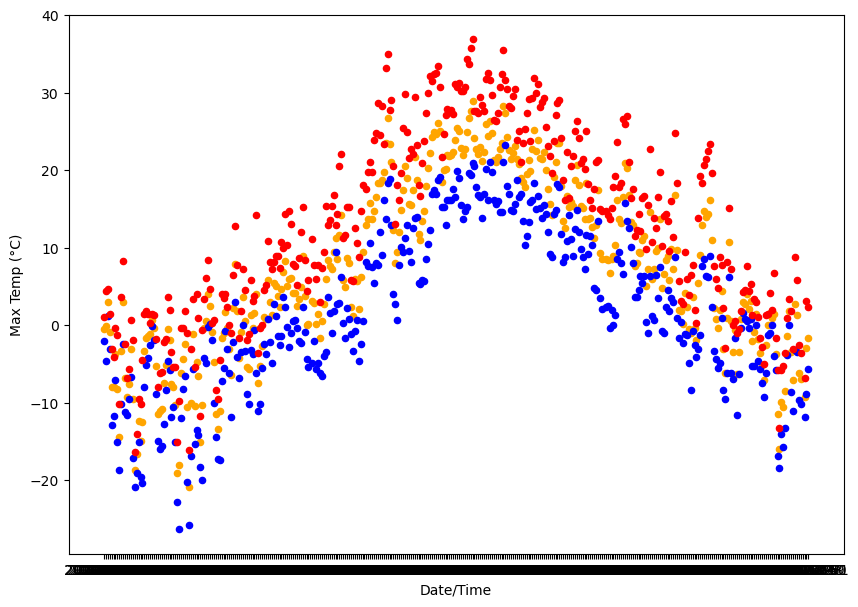

In [12]:
ax = weather2020.plot(x = 'Date/Time', y = 'Mean Temp (°C)', kind='scatter', color='orange', figsize=(10,7))
ax = weather2020.plot(x = 'Date/Time', y = 'Min Temp (°C)', kind='scatter', color='blue', ax=ax)
ax = weather2020.plot(x = 'Date/Time', y = 'Max Temp (°C)', kind='scatter', color='red', ax=ax)

Le traçage semble cohérent mais l’étiquetage de l’axe des x (Date/heure/Time) est étrange ! Pourquoi est-ce seulement un ensemble de lignes sans rendu des années ?

Le problème vient du fait que les données ne sont pas perçues comme une variable continue. La fonction de traçage tente de les traiter comme des données catégoriques et essaie par conséquent de générer une étiquette pour chaque date ! Les lignes noires représentent 366 de ces données, toutes superposées.

En revenant à la fonction `.info()` utilisée précédemment, nous constatons qu’il s’agit de données de type `object`. Ce n’est pas ce que nous voulons. Nous recherchons une valeur `datetime64`, soit le type de valeur qu’utilise Python pour stocker des dates.

Il y a deux façons de corriger le problème, à savoir spécifier le type de valeur durant la lecture des données à l’aide de la fonction `pd.read_csv` ou apporter la correction après la lecture des données. 

Nous utiliserons la seconde option c.-à-d convertir le type de données `object` to `datetime64` dans la colonne Date/Time

In [13]:
weather2020['Date/Time'] = weather2020['Date/Time'].astype('datetime64')

Nous procédons à nouveau au traçage en utilisant le même code que précédemment. Le graphe est maintenant différent puisque nous avons modifié les données traitées.

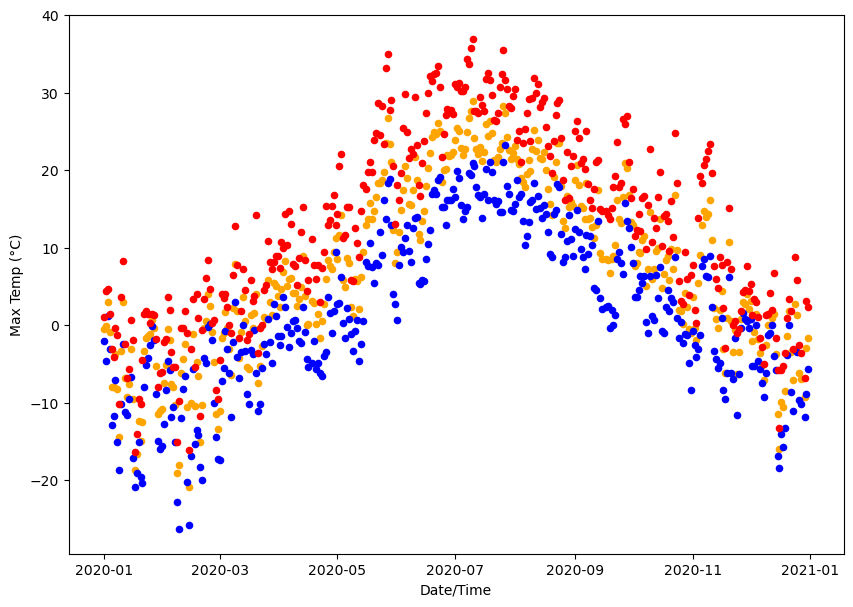

In [14]:
ax = weather2020.plot(x = 'Date/Time', y = 'Mean Temp (°C)', kind='scatter', color='orange', figsize=(10,7))
ax = weather2020.plot(x = 'Date/Time', y = 'Min Temp (°C)', kind='scatter', color='blue', ax=ax)
ax = weather2020.plot(x = 'Date/Time', y = 'Max Temp (°C)', kind='scatter', color='red', ax=ax)

Nettement mieux ! Toutes les dates apparaissent maintenant de manière lisible sur l’axe des x. 

Nous pouvons maintenant combiner nos deux jeux de données pour corréler les données cyclistes aux données météorologiques. Pandas dispose d’une fonction de fusion qui vous permet de fusionner deux jeux de données sur une colonne donnée. Dans notre cas, il s’agira de « Date » et « Date/Time ».

In [15]:
data2020 = pd.merge(left=bike2020, right=weather2020, left_on='Date', right_on='Date/Time')
data2020.drop('Date/Time', inplace=True, axis=1)

Voyons de quelles colonnes nous disposons à partir de ce jeu de données combinées grâce à la propriété `.columns` de la variable `data2020`.

In [16]:
data2020.columns

Index(['Date', '1^ALEX', '2^ORPY', '3^COBY', '4^CRTZ', '5^LMET', '10^OGLD',
       '11 OBVW', '12a^ADAWE', '12b^ADAWE', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)',
       'Spd of Max Gust (km/h)'],
      dtype='object')

Notre jeu de données combinées nous permet d’analyser plus en profondeur les données puisque nous pouvons maintenant comparer les colonnes contenants les données issues des compteurs de vélos à celles contenant notre jeu de données météorologiques. Commençons par tracer la température moyenne par opposition au nombre de vélos identifiés par le compteur « 1^ALEX ».

<Axes: xlabel='Mean Temp (°C)', ylabel='1^ALEX'>

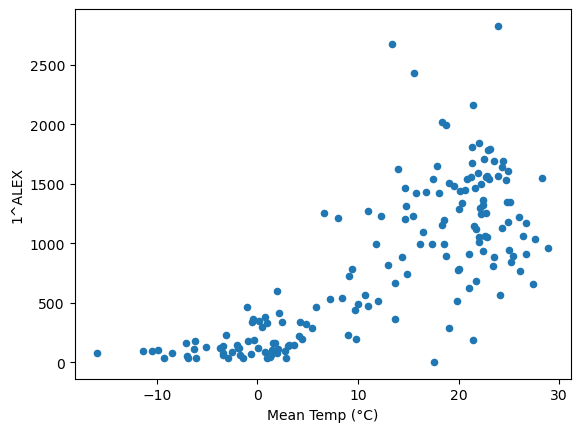

In [17]:
data2020.plot(kind='scatter', x='Mean Temp (°C)', y='1^ALEX')

Il semble clairement y avoir un lien entre la température et le nombre de cyclistes sur la piste cyclable du Pont Alexandra de la CNN (« 1^ALEX »). Vous remarquerez aussi qu’il y a peu de points de données à des températures sous la barre de -10 °C. Et nous savons pourquoi en lisant la documentation relative aux données sur le site Web Ottawa Ouverte. 

> Décompte en hiver :
> 
> Seuls les compteurs désignés comme « compteurs d’hiver » enregistrent des données valides entre la première accumulation de neige et le moment où la neige est déblayée ou fondue au printemps. Les compteurs d’hiver nécessitent un certain entretien du sentier ou de la voie cyclable pendant l’hiver. La voie cyclable où se trouve le compteur de la rue Somerset (en direction ouest seulement) n’est complètement déblayée que lorsque l’effort maximal y est mis; le compteur ne détecte donc pas tous les cyclistes à la suite d’une chute de neige abondante.

Et ce compteur n’est pas désignée comme « compteur d’hiver ». Il n’est tout simplement pas déblayé.

« Mais un instant! » dites-vous. N’avons-nous pas déjà supprimé plusieurs valeurs 0 ? N’est-ce pas simplement dû à l’hiver ? Ça aurait pu être le cas mais si vous retournez aux tracés contenant plein de zéros, vous constaterez qu’il s’agit de données relevées en mai, juillet et septembre alors que les chutes de neige sont peu probables. Qui plus est, la documentation accompagnant le jeu de données qualifie de non valides les données relevées sur les sentiers non hivernaux après la première accumulation de neige. Donc tout va bien.

Qu’en est-il de la pluie ? La pluie affecte-t-elle le dénombrement des cyclistes ? On penserait que oui car qui aime faire du vélo sous la pluie ? Pour le savoir, procédons au traçage.


<Axes: xlabel='Total Rain (mm)', ylabel='12a^ADAWE'>

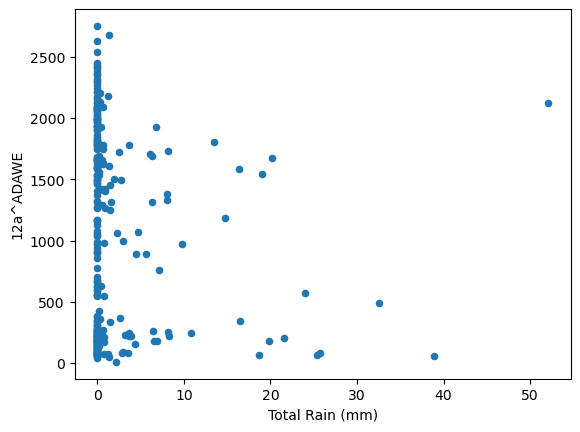

In [18]:
data2020.plot(kind='scatter', x='Total Rain (mm)', y='12a^ADAWE')

Ce diagramme nous indique qu’il y a moins de cycliste (axe des y) les jours où il tombe plus de millimètres de pluie (axe des x). Mais cela n’a pas une si forte incidence.

Vous observez aussi qu’il y a plusieurs jours sans aucune pluie. C’est là un excellent exemple de biais potentiel au niveau de données d’apprentissage. Nous disposons de beaucoup plus de données pour les jours sans pluie ou les jours où il ne tombe que peu de millimètres de pluie. Il se peut donc que notre algorithme ignore l’effet de la pluie lors de son apprentissage. Pour bien comprendre, imaginez 10 000 points de données pour lesquelles une propriété quelconque est absente et 10 points de données qui possèdent cette propriété. Toutes les données associées à ces 10 points seront inévitablement perçues comme du bruit dans le cadre de l’apprentissage du modèle.

En examinant plus en détails le diagramme ci-dessus, qu’advient-il du point isolé à droite ? Il signale plus de 2 000 cyclistes le jour où il est tombé plus de 50 millimètres de pluie. Comment peut-il y avoir autant de cyclistes un jour d’orage ? Cela semble suspect. Il s’agit probablement d’une donnée aberrante que nous devrions supprimer de nos données d’entrainement. Mais vérifions d’abord un autre compteur.


<Axes: xlabel='Total Rain (mm)', ylabel='4^CRTZ'>

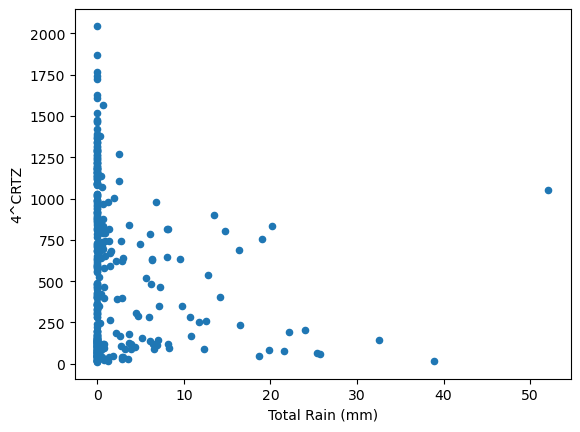

In [19]:
data2020.plot(kind='scatter', x='Total Rain (mm)', y='4^CRTZ')

Cette donnée aberrante est aussi présente pour le compteur « 4^CRTZ » et semble donc constante pour cette journée particulièrement pluvieuse. Examinons maintenant la ligne dans son intégralité.

In [20]:
data2020[data2020['Total Rain (mm)'] > 50]

,Date,1^ALEX,2^ORPY,3^COBY,4^CRTZ,5^LMET,10^OGLD,11 OBVW,12a^ADAWE,12b^ADAWE,...,Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
156,2020-06-05,1452.0,2340.0,1527.0,1054.0,1297.0,1129.0,1461.0,2125.0,2294.0,...,11.3,20.6,0.0,2.6,52.1,0.0,52.1,NaN,20.0,52.0


Soit le détecteur de pluie était défectueux, soit les compteurs de vélos n’aiment pas les fortes pluies. Il vaut mieux supprimer cette ligne car avoir autant de cyclistes sur l’ensemble des pistes cyclables par la pire journée de pluie de l’année n’a aucun sens.

In [21]:
data2020.drop(156, inplace=True)

Maintenant que nous avons supprimé les données aberrantes, voyons les autres corrélations entre nos données via la fonction `.corr()`. Puisque nous sommes limités aux corrélations entre nombres, commençons par sélectionner les colonnes qui contiennent des nombres.

La fonction `.background_gradient` nous permet d’assigner des couleurs dans les tableaux. Le bleu foncé indique une corrélation largement négative et le rouge foncé une corrélation largement positive. Il s’agit des conditions météorologiques ayant le plus d’impact, positif ou négatif, sur le nombre de cyclistes.

In [22]:
corr = data2020.select_dtypes(['number']).corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

/tmp/ipykernel_13287/1826579227.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


,1^ALEX,2^ORPY,3^COBY,4^CRTZ,5^LMET,10^OGLD,11 OBVW,12a^ADAWE,12b^ADAWE,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
1^ALEX,1.00,0.90,0.97,0.89,0.87,0.97,0.95,0.88,0.42,0.78,0.70,0.76,-0.77,0.48,-0.17,-0.24,-0.21,0.00,0.00,-0.18
2^ORPY,0.90,1.00,0.81,0.68,0.78,0.90,0.90,0.87,0.55,0.68,0.55,0.63,-0.68,0.24,-0.20,-0.22,-0.24,-0.15,0.06,-0.08
3^COBY,0.97,0.81,1.00,0.86,0.91,0.95,0.93,0.88,0.42,0.77,0.67,0.73,-0.75,0.39,-0.23,-0.23,-0.26,-0.04,0.04,-0.21
4^CRTZ,0.89,0.68,0.86,1.00,0.87,0.88,0.84,0.89,0.63,0.81,0.71,0.77,-0.78,0.44,-0.17,-0.26,-0.24,-0.33,0.04,-0.15
5^LMET,0.87,0.78,0.91,0.87,1.00,0.89,0.88,0.92,0.48,0.82,0.75,0.80,-0.80,0.51,-0.13,-0.26,-0.21,0.18,0.08,-0.14
10^OGLD,0.97,0.90,0.95,0.88,0.89,1.00,0.99,0.96,0.66,0.79,0.69,0.76,-0.77,0.42,-0.16,-0.24,-0.22,-0.29,0.04,-0.12
11 OBVW,0.95,0.90,0.93,0.84,0.88,0.99,1.00,0.95,0.53,0.79,0.69,0.75,-0.76,0.43,-0.15,-0.23,-0.21,-0.28,0.06,-0.11
12a^ADAWE,0.88,0.87,0.88,0.89,0.92,0.96,0.95,1.00,0.76,0.85,0.77,0.82,-0.84,0.44,-0.13,-0.28,-0.21,-0.19,0.04,-0.15
12b^ADAWE,0.42,0.55,0.42,0.63,0.48,0.66,0.53,0.76,1.00,0.49,0.40,0.45,-0.52,0.00,-0.25,-0.34,-0.35,-0.45,0.07,-0.16
Max Temp (°C),0.78,0.68,0.77,0.81,0.82,0.79,0.79,0.85,0.49,1.00,0.94,0.99,-0.97,0.66,0.11,-0.31,0.01,-0.37,0.01,0.01


Nous pouvons observer une corrélation plutôt positive entre les compteurs de vélos. Cela veut dire qu’en présence d’une circulation assez dense de vélos sur une piste cyclable, il est fort probable que la situation soit la même sur les autres pistes cyclables.

Pourtant, si nous examinons le compteur « 12b^ADAWE », nous constatons que la situation diffère de celles des autres compteurs. Mais rappelez-vous, nous avions précédemment pris note de ce compteur, estimant qu’il s’agissait de piétons et non de cyclistes. Cette table de corrélation nous donne un autre motif pour déterminer que cette colonne ne contient pas de données cyclistes fiables et que celles-ci devraient être supprimées.

Que pouvons-nous observer d’autre ? Nous observons dans toutes les autres colonnes une forte corrélation positive avec la température. Les gens circulent davantage en vélo lorsqu’il fait plus chaud, ce qui est logique. Il existe aussi une corrélation légèrement négative avec « Heat Deg Days (°C) » mais de quoi s’agit-il ? Selon le site Web d’Environnement Canada :

> **Degré-jour de chauffage**
> 
> On compte un degré-jour de chauffage pour chaque degré dont la température moyenne quotidienne est inférieure à 18 °C. Si la température est égale ou supérieure à 18 °C, le nombre de degrés-jours sera zéro. Par exemple, une journée ayant une température moyenne de 15,5 °C aura 2,5 degrés-jours de chauffage; une journée ayant une température moyenne de 20,5 °C aura zéro degré-jour de chauffage. Les degrés-jours de chauffage sont utilisés principalement pour estimer les besoins de chauffage des bâtiments.

Ce sont tout simplement les journées durant lesquelles les gens utilisent leur chauffage, c.-à-d. les journées froides.

Les autres corrélations impliquent la neige, la pluie et la vitesse du vent qui contribuent souvent à réduire le nombre de cycliste sur les pistes. Avec un facteur maximal de seulement 0,08 (sur 1), la direction du vent importe peu.

L’autre chose dont nous devons nous préoccuper au regard des colonnes de données est leur indépendance les unes par rapport aux autres. En effet, il serait insensé de prédire le nombre de cyclistes en fonction à la fois de la température maximale (Max Temp) et de la température moyenne (Mean Temp), la corrélation étant environ de 1. Elles présentent essentiellement la même valeur et nous ne ferions qu’introduire dans le modèle une certaine ambiguïté. 
Il existe une redondance similaire entre la précipitation totale (Total Precip) et la pluie totale (Total Rain). Il est sans doute préférable de n’utiliser que les valeurs de précipitation (Total Precip) ou celles de la neige et de la pluie.

Supprimons donc de notre jeu de données d’apprentissage les valeurs de 12b^ADAWE pour température minimale (Min Temp), de température moyenne (Mean Temp) et de précipitations totales (Total Precip).

In [23]:
data2020.drop(['12b^ADAWE', 'Min Temp (°C)', 'Mean Temp (°C)', 'Total Precip (mm)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)'], inplace=True, axis=1)

Si nous disposons maintenant d’un jeu de données plutôt nettes. Il y a encore quelques **données manquantes**

In [24]:
data2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       365 non-null    datetime64[ns]
 1   1^ALEX                     171 non-null    float64       
 2   2^ORPY                     166 non-null    float64       
 3   3^COBY                     256 non-null    float64       
 4   4^CRTZ                     365 non-null    float64       
 5   5^LMET                     365 non-null    float64       
 6   10^OGLD                    356 non-null    float64       
 7   11 OBVW                    329 non-null    float64       
 8   12a^ADAWE                  288 non-null    float64       
 9   Max Temp (°C)              361 non-null    float64       
 10  Total Rain (mm)            364 non-null    float64       
 11  Total Snow (cm)            364 non-null    float64       
 12  Snow on 

Seulement trois des sept compteurs affichent des données quotidiennes (Date, 4^CRTZ, et 5^LMET). Il manque des données météorologiques pour certains jours. Nous pourrions ignorer toutes les lignes dans lesquelles il manque des données mais cela impliquerait se débarrasser de données utiles présentes dans d’autres colonnes !

Comme nous l’avons noté, la meilleure pratique de gestion des données de recherche consiste à ne jamais avoir de valeurs vides. Pour assurer son bon fonctionnement, tout algorithme d’apprentissage automatique doit avoir des lignes complètes sans aucune valeur manquante. Notre jeu de données ne doit donc pas comporter de valeur manquante. Un algorithme ne sachant pas comment traiter des valeurs manquantes, nous devons assigner des valeurs ou supprimer les lignes avant d’aliment le modèle avec des données d’apprentissage.

De fait, voyons combien il reste de lignes si nous supprimons toutes celles qui comportent ne serait-ce qu’une seule valeur manquante. 


In [25]:
len(data2020.dropna())

13

Il ne reste que treize lignes. Cela ne constitue pas un un jeu de données suffisamment grand pour entrainer notre modèle ! Que pouvons-nous faire d’autre ?

Nous pouvons imputer des données. Cela signifie induire une valeur en fonction de données probantes et d’un raisonnement. Si cela vous semble équivaloir à « fabriquer des données » ou à « mentir », c’est en fait une méthodologie valide. Nous pourrions remplacer les valeurs manquantes par la moyenne ou interpoler des données en fonction des journées adjacentes. Nous pouvons utiliser toute approche aboutissant à des estimations raisonnables. Dans ce cas-ci, une bonne pratique de gestion des données reposerait sur une documentation limpide de la méthodologie d’imputation pour assurer une vérification indépendante des valeurs de données.

À titre d’exemple, il manque beaucoup de valeurs dans la ligne « Snow on Grnd (cm) ». Voyons de quoi il retourne.

<Axes: xlabel='Date', ylabel='Snow on Grnd (cm)'>

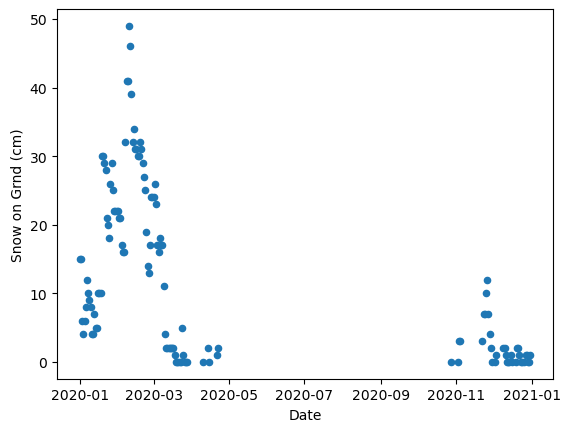

In [26]:
data2020.plot(x='Date', y='Snow on Grnd (cm)', kind='scatter')

Nous pouvons déduire de cette visualisation que les valeurs manquantes signifient que la quantité de neige au sol n’est pas mesurée pendant les mois d’été. Selon cette hypothèse, nous pouvons remplacer toutes les valeurs manquantes par 0 pour représenter 0 cm d’enneigement. Voyons ce que cela donne si nous remplaçons toutes les valeurs manquantes par 0 et procédons au traçage.

<Axes: xlabel='Date', ylabel='Snow on Grnd (cm)'>

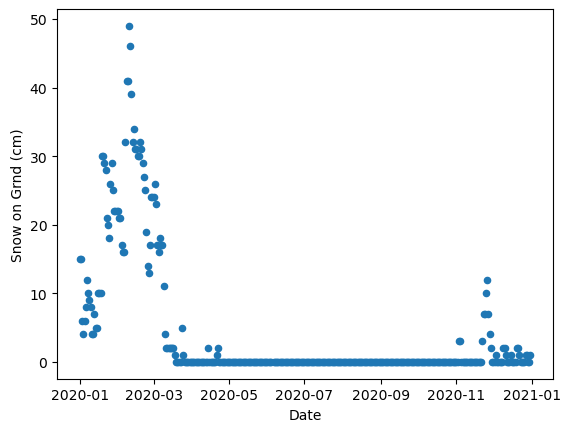

In [27]:
data2020.fillna({'Snow on Grnd (cm)': 0}).plot(x='Date', y='Snow on Grnd (cm)', kind='scatter')

L’inférence de 0 cm de neige aplatit trop la représentation graphique. Cela signifie qu’imputer les données se traduira ici par une prédiction erronée des conditions météorologiques dans notre modèle. (JVdeK est-ce correct ? Il faut élaborer davantage sur ce que l’on entend par « trop »). Ainsi nous pouvons voir qu’il n’y avait que 4 cm de neige au sol en novembre et que cette neige a disparu soudainement. Il vaudrait peut-être mieux utiliser la méthode de remplissage pour imputer les données manquantes. Cette méthode consiste à copier la valeur de la journée précédente pour remplacer toute valeur manquante. Si une valeur est absente le 20 novembre, on peut utiliser celle du 19 novembre. Si celle-ci est aussi manquante, on utilisera alors celle du 18 novembre et ainsi de suite. Voyons comment se présente alors la représentation graphique :

<Axes: xlabel='Date', ylabel='Snow on Grnd (cm)'>

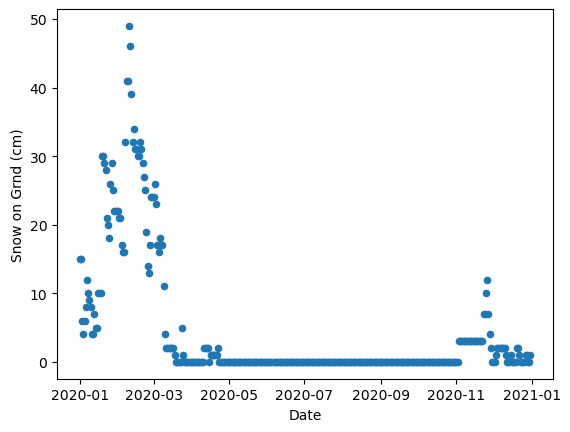

In [28]:
data2020['Snow on Grnd (cm)'] = data2020['Snow on Grnd (cm)'].fillna(method='backfill')
data2020.plot(x='Date', y='Snow on Grnd (cm)', kind='scatter')

C’est beaucoup mieux maintenant que nous avons de la neige qui reste au sol après une chute de neige. Voyons combien de lignes complètes nous avons maintenant.

In [29]:
len(data2020.dropna())

53

Nettement mieux ! Nous sommes passés de 13 à 53 lignes complètes.

Nous imputerons maintenant les données manquantes relatives aux bourrasques de vent.

<Axes: xlabel='Date'>

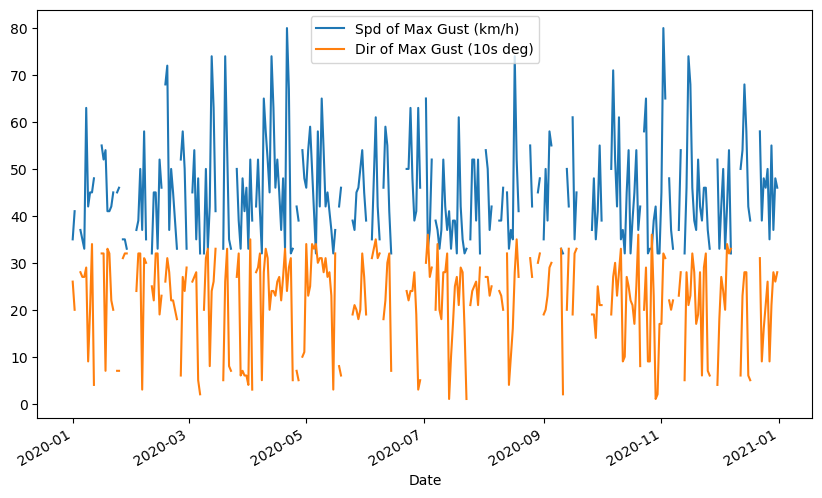

In [30]:
data2020.plot(x='Date', y=['Spd of Max Gust (km/h)', 'Dir of Max Gust (10s deg)'], kind='line', figsize=(10,6))

Le graphique varie beaucoup et va dans tous les sens. Établir les valeurs manquantes à 0 ne convient pas car ces valeurs se situent tout au bas du graphique et diffèrent grandement des données existantes. La méthode de remplissage n’est guère mieux puisqu’il y a trop de variations d’une journée à l’autre. N’oubliez pas que le remplissage repose sur l’hypothèse que la journée précédente est un bon indicateur de ce que les choses devraient être aujourd’hui mais le vent varie trop d’une journée à l’autre. Utilisons plutôt les valeurs moyennes pour quantifier la vitesse et la direction du vent, une sorte de compromis pour obtenir une mesure « moyenne » du vent. Nous devons en effet établir une valeur pour être en mesure de combler les données manquantes.

La moyenne n’est pas non plus la valeur représentative idéale, notamment au regard de la variabilité, mais elle demeure la meilleure solution en termes de précision de notre modèle. Comme il n’y a pas trop de valeurs manquantes dans les colonnes relatives au vent, les données imputées n’auront pas un effet statistique trop marqué sur les prédictions. Substituons donc la moyenne aux valeurs manquantes :

In [31]:
data2020.fillna({
    'Dir of Max Gust (10s deg)': data2020['Dir of Max Gust (10s deg)'].mean(),
    'Spd of Max Gust (km/h)': data2020['Spd of Max Gust (km/h)'].mean()
}, inplace=True)

Combien y a-t-il de lignes complètes maintenant ?

In [32]:
len(data2020.dropna())

70

Super, nous avons maintenant 70 lignes de données complètes, ce qui est beaucoup mieux que les 13 lignes avec lesquelles nous avons commencé. Tout se passe bien. Regardons à nouveau `.info()` pour voir ce qu'il nous reste à faire pour préparer les données pour notre modèle.

In [33]:
data2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       365 non-null    datetime64[ns]
 1   1^ALEX                     171 non-null    float64       
 2   2^ORPY                     166 non-null    float64       
 3   3^COBY                     256 non-null    float64       
 4   4^CRTZ                     365 non-null    float64       
 5   5^LMET                     365 non-null    float64       
 6   10^OGLD                    356 non-null    float64       
 7   11 OBVW                    329 non-null    float64       
 8   12a^ADAWE                  288 non-null    float64       
 9   Max Temp (°C)              361 non-null    float64       
 10  Total Rain (mm)            364 non-null    float64       
 11  Total Snow (cm)            364 non-null    float64       
 12  Snow on 

Il ne reste plus tellement de valeurs manquantes en ce qui concerne la météo. La pire lacune se situe su niveau de la température maximale, avec 4 valeurs manquantes. Nous pouvons recourir encore une fois au remplissage, en fonction des modèles de variation de la température observés. En effet, la température d’hier avoisine probablement celle d’aujourd’hui.

In [34]:
data2020['Max Temp (°C)'] = data2020['Max Temp (°C)'].fillna(method='backfill')
data2020['Total Rain (mm)'] = data2020['Total Rain (mm)'].fillna(method='backfill')
data2020['Total Snow (cm)'] = data2020['Total Snow (cm)'].fillna(method='backfill')

In [35]:
len(data2020.dropna())

71

Les compteurs de vélos présentent encore certaines valeurs manquantes. Réexaminons-les tous.

<Axes: xlabel='Date'>

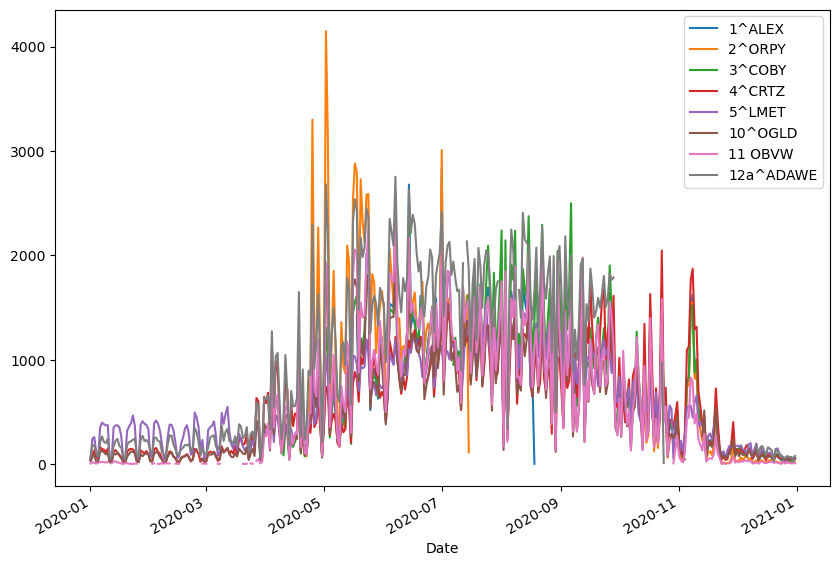

In [36]:
data2020.plot(x='Date', y=['1^ALEX','2^ORPY','3^COBY','4^CRTZ','5^LMET','10^OGLD','11 OBVW','12a^ADAWE'], figsize=(10,7))

Ils se ressemblent pas mal tous. Remplaçons les valeurs manquantes par la moyenne affichée par les autres compteurs cette journée-là selon la prémisse voulant que s’il y a plus de trafic sur les autres pistes cyclables, il y aura probablement aussi plus de trafic sur les pistes qui affichent des valeurs manquantes. Il y a toutefois des données aberrantes, notamment pour « 2^ORPY », mais les données sont assez similaires à celles d’autres compteurs. À titre d’exemple on dénote aussi des pointes pour le compteur « 5^LMET ». Nous ne recherchons pas la perfection mais une représentation suffisante. Par « suffisante », nous entendons ici des données qui permettent d’entrainer notre modèle tout en prévoyant un résultat valide.

In [37]:
countercolumns = ['1^ALEX','2^ORPY','3^COBY','4^CRTZ','5^LMET','10^OGLD','11 OBVW','12a^ADAWE']
for colname in countercolumns: # Loop over all of the column names
    othercolumns = [c for c in countercolumns if c != colname] # Get the name of every column except this column we are doing now
    meanofmissing = data2020[data2020[colname].isna()][othercolumns].mean(axis=1) # Get the mean of all the other columns from the rows where this column is missing values
    data2020.loc[data2020[colname].isna(), colname] = meanofmissing # Replace the missing values in this column with the mean we calculated from the other columns.

Nous effectuons à nouveau un traçage pour déceler toute anomalie potentielle.

<Axes: xlabel='Date'>

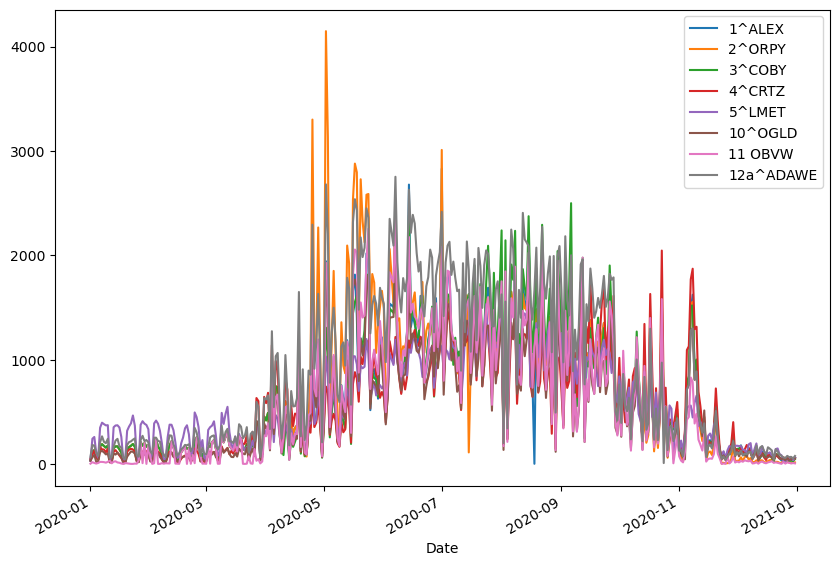

In [38]:
data2020.plot(x='Date', y=['1^ALEX','2^ORPY','3^COBY','4^CRTZ','5^LMET','10^OGLD','11 OBVW','12a^ADAWE'], figsize=(10,7))

In [39]:
data2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 365
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       365 non-null    datetime64[ns]
 1   1^ALEX                     365 non-null    float64       
 2   2^ORPY                     365 non-null    float64       
 3   3^COBY                     365 non-null    float64       
 4   4^CRTZ                     365 non-null    float64       
 5   5^LMET                     365 non-null    float64       
 6   10^OGLD                    365 non-null    float64       
 7   11 OBVW                    365 non-null    float64       
 8   12a^ADAWE                  365 non-null    float64       
 9   Max Temp (°C)              365 non-null    float64       
 10  Total Rain (mm)            365 non-null    float64       
 11  Total Snow (cm)            365 non-null    float64       
 12  Snow on 

Nous disposons maintenant d’un jeu de données complet. Des valeurs raisonnables sont affichées dans tous les champs. Nous disposons de données nettes à partir desquelles nous pouvons travailler. N’oubliez pas que toute cette préparation des données a pour but de prédire le nombre de cyclistes sur les pistes en fonction de la météo. Nous pouvons maintenant établir un modèle pour chaque voie cyclable. 

# Modèle de régression linéaire aux fins d’apprentissage machine

Maintenant que nous disposons d’un bon jeu de données nettes, nous pouvons passer dans ce tutoriel au volet de l’apprentissage machine. Tel que mentionné au tout début, nous utiliserons la régression linéaire, le plus simple des algorithmes d’apprentissage automatique, qui prend pour acquis que tout relève de la linéarité. C’est-à-dire que si vous augmentez la valeur A de 10 %, la valeur B augmentera de 20 % et la valeur C augmentera de 5 %. Vous pouvez vous le représenter en indiquant tous les points sur un graphique et en traçant la ligne droite qui se rapproche le plus de tous les points.

Dans notre cas, nous avons 6 colonnes météorologiques qui serviront de données d’entrée pour prévoir la circulation sur chaque piste cyclable. Si nous tentions d’exécuter ce traçage, nous obtiendrions un graphique en 7 dimensions difficile à visualiser !

Si la régression linéaire est probablement le plus simple des algorithmes d’apprentissage automatique, elle présente certaines limitations puisqu’elle assume que tous les liens entre les différents aspects de la météo sont de nature linéaire, ce qui n’est pas tout à fait vrai. Pensez à la température. Une température trop froide découragera certains cyclistes. Mais une température trop chaude pourra aussi en décourager certains. Une meilleure pratique de gestion des données de recherche consistera à consigner ces limitations dans la documentation relative aux données ou à la méthodologie.

Notre apprentissage se fera via l’application « scikit-learn ». Bien que ce ne soit pas la seule application disponible, elle fonctionne très bien.

Importons maintenant le modèle de régression linéaire pour l’intégrer à notre carnet. 


In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

Nous devrons entrainer notre modèle et le mettre à l’essai pour voir s’il parvient à prévoir les déplacements en vélo en fonction de la météo. Une façon répandue de procéder consiste à diviser votre jeu de données en deux ensembles, un d’apprentissage et un d’essai. L’application scikit-learn est dotée de la fonction `train_test_split` pour réaliser cette tâche.

In [41]:
from sklearn.model_selection import train_test_split

Nous devons établir une distinction entre nos données d’entrée (features / références) et les données de prévision (labels / étiquettes). Revoyons nos colonnes :

In [42]:
data2020.columns

Index(['Date', '1^ALEX', '2^ORPY', '3^COBY', '4^CRTZ', '5^LMET', '10^OGLD',
       '11 OBVW', '12a^ADAWE', 'Max Temp (°C)', 'Total Rain (mm)',
       'Total Snow (cm)', 'Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)',
       'Spd of Max Gust (km/h)'],
      dtype='object')

Nous choisirons la météo comme donnée d’entrée, donc nos valeurs x, et les compteurs de vélos comme mesures prédictives, donc les valeurs y. Nous séparons ensuite nos données en un ensemble d’apprentissage et un ensemble d’essai., dans un rapport de 70/30. Ce rapport de 70/30 est quelque peu arbitraire. Le rapport dépend de la quantité de données dont vous disposez. L’entraînement sera meilleur avec plus de données d’apprentissage. Les essais seront aussi plus concluants avec plus de données. Si vos données sont limitées, un rapport de 80/20 sera préférable pour mettre l’accent sur l’apprentissage du modèle.

In [43]:
X = data2020[['Max Temp (°C)', 'Total Rain (mm)',
       'Total Snow (cm)', 'Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)',
       'Spd of Max Gust (km/h)']]
y = data2020[['1^ALEX', '2^ORPY', '3^COBY', '4^CRTZ', '5^LMET', '10^OGLD',
       '11 OBVW', '12a^ADAWE']]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

Nous utiliserons maintenant l’ensemble de données d’apprentissage pour entrainer le modèle. Nous alimentons le modèle (`model`, notre modèle de régression linéaire) à l’aide des données d’apprentissage (`fit`) pour l’entraîner de manière optimale.

In [44]:
model.fit(X_train, y_train)

LinearRegression()

L’entrainement du modèle est maintenant complété. Nous pouvons observer les coefficients linéaires générés même si ceux-ci ne nous disent pas grand-chose.

In [45]:
model.coef_

array([[ 38.89067124, -26.53292634,  -8.10892686,   5.32534541,
         -2.37212436,  -4.99190478],
       [ 45.02794459, -31.20463258, -10.69572445,   6.91299542,
         -4.42309122,  -5.00582244],
       [ 43.53797935, -27.30185659,  -8.91990776,   7.30428004,
         -1.2946835 ,  -4.50868762],
       [ 31.95333134, -23.16722655,  -7.82276016,   1.3060502 ,
          2.5353452 ,  -4.70620879],
       [ 30.42083212, -17.01770208, -13.72256588,   8.31885308,
          0.16916755,  -4.51171797],
       [ 33.46720279, -24.54310503,  -6.13929822,   2.96370226,
         -2.105166  ,  -4.16281726],
       [ 42.32736593, -28.74690279,  -4.40274597,   4.87584094,
         -1.23498574,  -5.15554836],
       [ 53.88121427, -34.18551477, -13.74932342,   6.25905411,
          1.41566423,  -6.49642759]])

Nous voulons plutôt utiliser l’ensemble de données d’essai mis de côté pour évaluer la capacité de prédiction de notre modèle, en fonction des références. L’application scikit-learn offre certains outils pour le faire, alors importons-les. 

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

Identifions maintenant les valeurs prédites en fonction de notre ensemble de données d’essai.

In [47]:
predictions = model.predict(X_test)

Nous pouvons comparer ces valeurs aux valeurs réelles que nous avons conservées dans notre ensemble d’essai. Nous mesurons ensuite le résultat $R^2$ et l’erreur quadratique moyenne qui nous renseigne sur l’ampleur de la déviation du modèle par rapport aux données réelles.

In [48]:
r2_score(y_test, predictions)

0.6459884971495191

In [49]:
mean_squared_error(y_test, predictions, squared=False)

/usr/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


347.15893180469766

Plus le résultat $R^2$ se rapproche de 1, meilleur est l’entraînement. Il est ici de 0,7, ce qui n’est ni super bon ni mauvais. L’erreur quadratique moyenne indique dans quelle mesure le compte prévu dévie du compte réel. L’erreur est d’environ 300 ce qui signifie que nos prédictions se situent en moyenne dans une marge de 300 des valeurs réelles. Ce qui n’est pas trop mal. Tout dépend du niveau de précision recherché pour cet usage particulier.  

Adoptons maintenant une approche plus visuelle. Voyons comment cela fonctionne pour l’année 2019. Le jeu de données utilisé pour l’entraînement concernait l’année 2020. Notre modèle ne connait rien de l’année 2019.

Let's read the bike_counter.xlsx file again but this time take the 2019 tab.

In [50]:
bike2019 = pd.read_excel('MLTS_20240530_DCRF_Bike_Counter_1.0.xlsx', sheet_name="2019")

Aux fins de comparaison, nous n’avons pas à trop nous préoccuper de corriger les données météorologiques. Il suffit de combler les données manquantes sur les précipitations de neige.

In [51]:
weather2019 = pd.read_csv('MLTS_20240530_DCRF_Climate_Data_2019_P1D_EN_1.0.csv')
weather2019 = weather2019[['Date/Time', 'Max Temp (°C)', 'Total Rain (mm)', 'Total Snow (cm)', 'Snow on Grnd (cm)',
             'Dir of Max Gust (10s deg)', 'Spd of Max Gust (km/h)']]
weather2019['Snow on Grnd (cm)'] = weather2019['Snow on Grnd (cm)'].fillna(method='backfill')

Vous pouvez maintenant ignorer toutes les lignes qui présentent des valeurs manquantes. Nous devons par ailleurs réinitialiser l’index dans Pandas sinon l’assignation des valeurs pourrait éventuellement devenir bizarre.  

In [52]:
weather2019 = weather2019.dropna().reset_index().drop('index', axis=1)

Procédez aux prédictions à l’aide des données météorologiques de 2019.

In [53]:
bikepred2019 = pd.DataFrame(
    model.predict(
        weather2019.drop('Date/Time', axis=1)),
        columns=['1^ALEX', '2^ORPY', '3^COBY', '4^CRTZ', '5^LMET', '10^OGLD', '11 OBVW', '12a^ADAWE'])
bikepred2019['Date'] = weather2019[['Date/Time']].astype('datetime64')

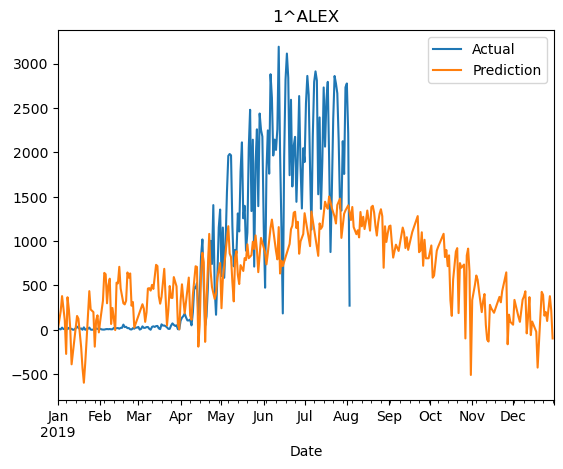

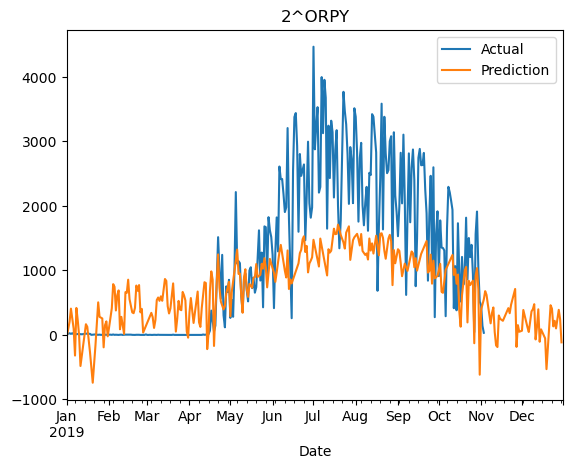

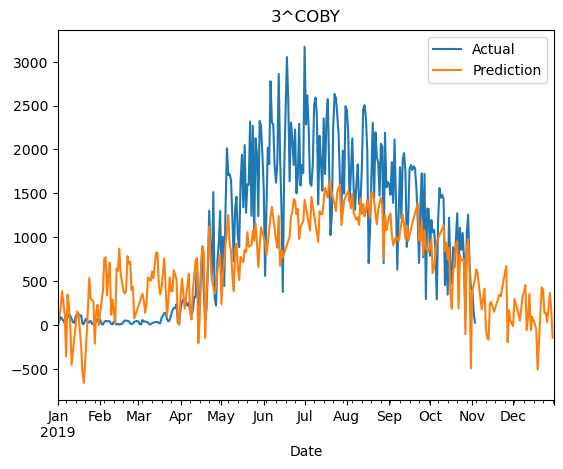

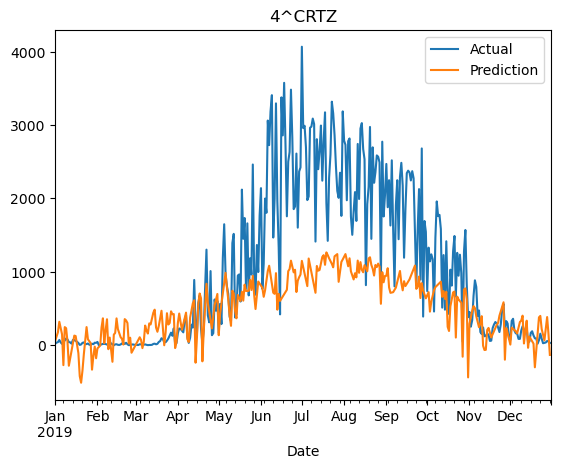

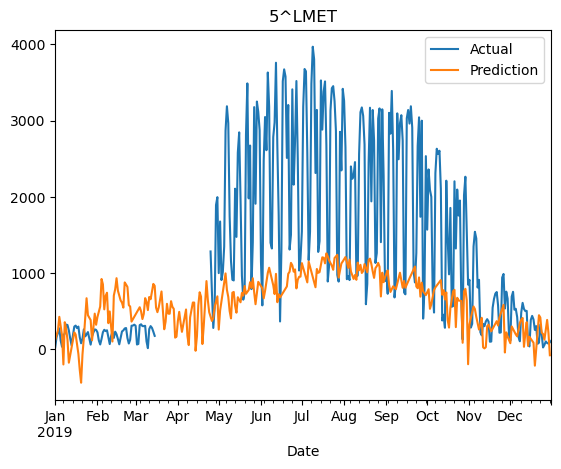

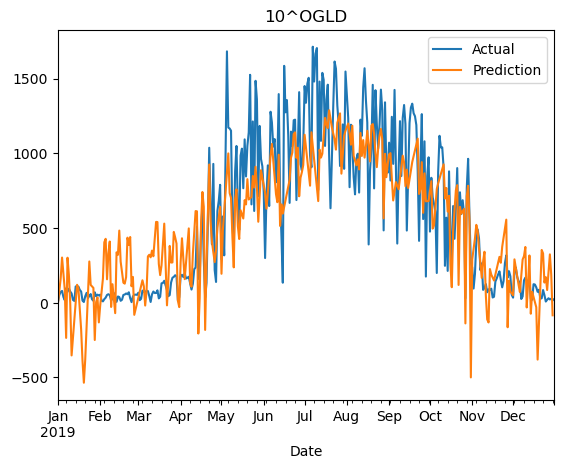

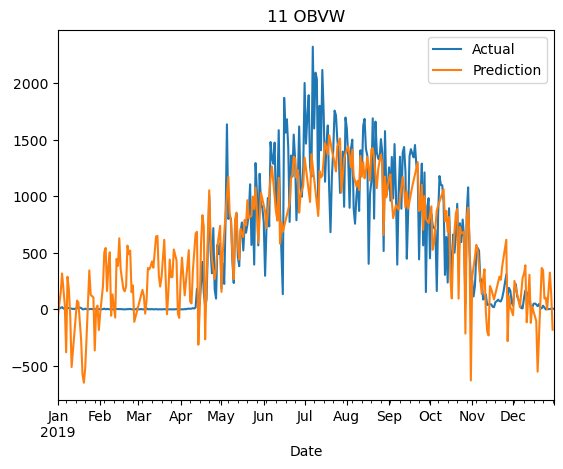

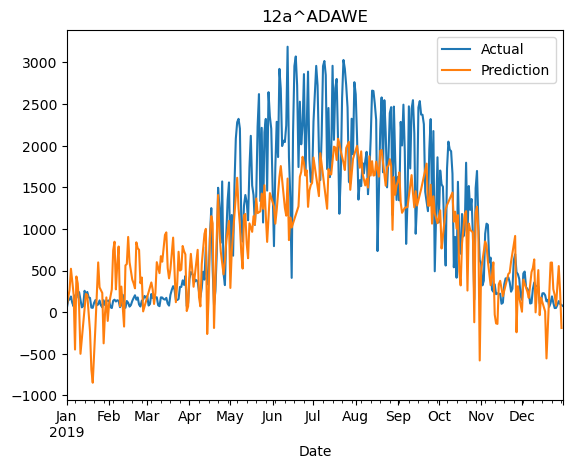

In [54]:
for colname in ['1^ALEX', '2^ORPY', '3^COBY', '4^CRTZ', '5^LMET', '10^OGLD', '11 OBVW', '12a^ADAWE']:
    ax = bike2019.plot(x='Date', y=colname, label='Actual', title=colname)
    bikepred2019.plot(x='Date', y=colname, ax=ax, label='Prediction')

N’oubliez pas que la date n’est pas une valeur en termes de données d’apprentissage. Elle ne sert qu’à indiquer une tendance mensuelle par rapport aux données météorologiques, ce qui est plutôt remarquable ! Si le modèle fonctionne plutôt bien pour quelques-unes des voies (10^OGLD et 11^OBVW), comme en témoigne le décompte des vélos qui épouse les données actuelles, il fonctionne moins bien pour quelques autres (p. ex. 4^CRTZ et 5^LMET). En effet, il y a d’énormes différences entre les deux lignes du graphe. Mais le modèle reproduit toujours la tendance générale, c.-à-d. moins de cyclistes en hiver qu’en été et une croissance progressive de leurs nombres en mai avant de diminuer à nouveau en septembre. 

# Conclusion

Vous avez découvert dans ce tutoriel diverses techniques d’épuration des données et comment les appliquer à des données issues de sources secondaires. Vous avez aussi appris que la constitution d’un jeu de données d’apprentissage requiert la formulation d’hypothèses éclairées quanta aux données manquantes, la documentation et le bien fondé de conserver ou supprimer ces valeurs. Enfin, vous avez appris comment exploiter un jeu de données nettes dans un modèle de régression linéaire. Ce simple algorithme d’apprentissage machine prédit certaines valeurs en fonction de données d’entrée auparavant inconnues.

Vous êtes maintenant en mesure d’appliquer ces connaissances au prochain tutoriel sur les forêts aléatoires et les arbres décisionnels, qui sont d'autres techniques d'apprentissage automatique permettant de classer les choses, mais d'une manière plus compréhensible pour une personne.